In [2]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

========= test size 0.5 ===========
U-statistic: 6.0
P-value: 0.0068359375
The distributions are significantly different.
========= test size 0.5 ===========
U-statistic: 5.0
P-value: 0.0048828125
The distributions are significantly different.


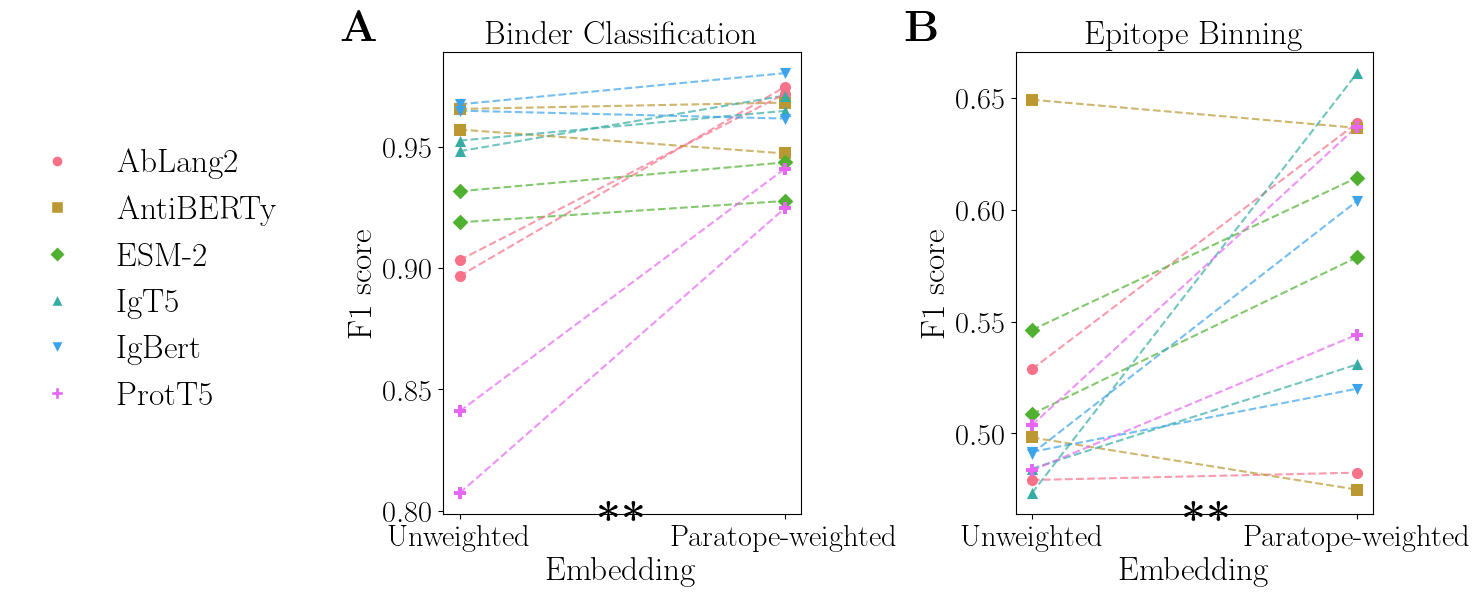

In [3]:
# A
benchmark=Path("/home/athenes/Paraplume/data_with_scripts/sequence_representation/binder_classification/results")

records=[]
for file in benchmark.rglob("*.json"):
    with open(file) as f:
        data=json.load(f)
    data= {k: v for k, v in data.items()}
    data["dataset"]=file.parents[0].stem.split("_")[0]
    records.append(data)

df=pd.DataFrame.from_records(records)

test_sizes = df.query("llm!='all'").groupby(["dataset","llm","sequence_embedding","test_size"])["f1_score"].mean().reset_index()

embedding_labels = {
    "embeddings_classical": "Unweighted",
    "embeddings_paratope": "Paratope-weighted"
}
llm_labels = {
    "ablang2": "AbLang2",
    "igT5": "IgT5",
    "igbert": "IgBert",
    "antiberty": "AntiBERTy",
    "esm": "ESM-2",
    "prot-t5": "ProtT5"
}
test_sizes['sequence_embedding_new'] = test_sizes['sequence_embedding'].map(embedding_labels)
test_sizes['llm_new'] = test_sizes['llm'].map(llm_labels)
from scipy.stats import wilcoxon

for test_size in [0.5]:
    paratope_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Paratope-weighted'")["f1_score"].tolist()
    averaged_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Unweighted'")["f1_score"].tolist()
    print(f"========= test size {test_size} ===========")
    u_statistic, p_value = wilcoxon(paratope_embeds, averaged_embeds, alternative='two-sided')

    print(f"U-statistic: {u_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

test_sizes["id"]=test_sizes["llm_new"]+" Dataset "+test_sizes["dataset"].apply(lambda x:x[-1])
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({
    "axes.titlesize": 24,
    "axes.labelsize": 18,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "legend.fontsize": 24,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

df = test_sizes
df["sequence_embedding_new"] = pd.Categorical(df["sequence_embedding_new"], categories=["Unweighted", "Paratope-weighted"], ordered=True)

llms = df["llm_new"].unique()
llm_palette = dict(zip(llms, sns.color_palette("husl", len(llms))))
llm_markers = dict(zip(llms, ["o", "s", "D", "^", "v", "P"]))  # Use different marker styles

# First plot for the data
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), gridspec_kw={'wspace': 0.6})
for llm in llms:
    subset = df[df["llm_new"] == llm]
    sns.stripplot(
        x="sequence_embedding_new", y="f1_score", data=subset,
        dodge=False, jitter=False, alpha=1,
        color=llm_palette[llm], marker=llm_markers[llm], size=8,
        ax=axs[0]
    )

bins = df["id"].unique()
x_positions = {"Unweighted": 0, "Paratope-weighted": 1}  # Ensure exact x positions

for bin_value in bins:
    bin_data = df[df["id"] == bin_value]
    for llm in bin_data["llm_new"].unique():
        llm_data = bin_data[bin_data["llm_new"] == llm]
        g_value = llm_data[llm_data["sequence_embedding_new"] == "Unweighted"]["f1_score"].values
        s_value = llm_data[llm_data["sequence_embedding_new"] == "Paratope-weighted"]["f1_score"].values

        if len(g_value) > 0 and len(s_value) > 0:
            axs[0].plot([x_positions["Unweighted"], x_positions["Paratope-weighted"]], [g_value[0], s_value[0]],
                    color=llm_palette[llm], linestyle="--", alpha=0.7)
axs[0].set_xlabel(r"Embedding", fontsize=24)
axs[0].set_ylabel(r"F1 score", fontsize=24)
axs[0].set_title(r"Binder Classification")

#B
benchmark=Path("/home/athenes/Paraplume/data_with_scripts/sequence_representation/epitope_binning/results")

records=[]
for file in benchmark.rglob("*.json"):
    with open(file) as f:
        data=json.load(f)
    data= {k: v for k, v in data.items()}
    data["dataset"]=data["data_path"].split("/")[-1]
    records.append(data)

df=pd.DataFrame.from_records(records)

test_sizes = df.query("llm!='all'").groupby(["dataset","llm","sequence_embedding","test_size"])["f1_score"].mean().reset_index()

embedding_labels = {
    "embeddings_classical": "Unweighted",
    "embeddings_paratope": "Paratope-weighted"
}
llm_labels = {
    "ablang2": "AbLang2",
    "igT5": "IgT5",
    "igbert": "IgBert",
    "antiberty": "AntiBERTy",
    "esm": "ESM-2",
    "prot-t5": "ProtT5"
}
test_sizes['sequence_embedding_new'] = test_sizes['sequence_embedding'].map(embedding_labels)
test_sizes['llm_new'] = test_sizes['llm'].map(llm_labels)

for test_size in [0.5]:
    paratope_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Paratope-weighted'")["f1_score"].tolist()
    averaged_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Unweighted'")["f1_score"].tolist()
    print(f"========= test size {test_size} ===========")
    u_statistic, p_value = wilcoxon(paratope_embeds, averaged_embeds, alternative='two-sided')

    print(f"U-statistic: {u_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

test_sizes["id"]=test_sizes["llm_new"]+" Dataset "+test_sizes["dataset"].apply(lambda x:x.split('_')[-1].strip(".pkl")[-1])
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({
    "axes.titlesize": 24,
    "axes.labelsize": 18,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "legend.fontsize": 24,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

df = test_sizes
df["sequence_embedding_new"] = pd.Categorical(df["sequence_embedding_new"], categories=["Unweighted", "Paratope-weighted"], ordered=True)

llms = df["llm_new"].unique()
llm_palette = dict(zip(llms, sns.color_palette("husl", len(llms))))
llm_markers = dict(zip(llms, ["o", "s", "D", "^", "v", "P"]))  # Use different marker styles

# First plot for the data
for llm in llms:
    subset = df[df["llm_new"] == llm]
    sns.stripplot(
        x="sequence_embedding_new", y="f1_score", data=subset,
        dodge=False, jitter=False, alpha=1,
        color=llm_palette[llm], marker=llm_markers[llm], size=8, ax=axs[1]
    )

bins = df["id"].unique()
x_positions = {"Unweighted": 0, "Paratope-weighted": 1}  # Ensure exact x positions

for bin_value in bins:
    bin_data = df[df["id"] == bin_value]
    for llm in bin_data["llm_new"].unique():
        llm_data = bin_data[bin_data["llm_new"] == llm]
        g_value = llm_data[llm_data["sequence_embedding_new"] == "Unweighted"]["f1_score"].values
        s_value = llm_data[llm_data["sequence_embedding_new"] == "Paratope-weighted"]["f1_score"].values

        if len(g_value) > 0 and len(s_value) > 0:
            axs[1].plot([x_positions["Unweighted"], x_positions["Paratope-weighted"]], [g_value[0], s_value[0]],
                    color=llm_palette[llm], linestyle="--", alpha=0.7)
axs[1].set_xlabel(r"Embedding", fontsize=24)
axs[1].set_ylabel(r"F1 score", fontsize=24)
axs[1].set_title(r"Epitope Binning")
handles = [plt.Line2D([0], [0], marker=llm_markers[llm], color='w',
                      markerfacecolor=llm_palette[llm], markersize=8, label=llm)
           for llm in llms]

# Add legend to the figure (not to a specific axis)
fig.legend(handles=handles, loc='center left', bbox_to_anchor=(-0.25, 0.5), frameon=False)
fig.text(0.04, 0.9, r'\textbf{A}', fontsize=32)  # Top left of 3rd row, Column 3
fig.text(0.51, 0.9, r'\textbf{B}', fontsize=32)  # Top left of 3rd row, Column 3
fig.text(0.255, 0.1, r'\textbf{**}', fontsize=32)  # Top left of 3rd row, Column 3
fig.text(0.742, 0.1, r'\textbf{**}', fontsize=32)  # Top left of 3rd row, Column 3


plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/figure6.png", bbox_inches='tight', dpi=300)
plt.show()